In [45]:
!pip install --upgrade matplotlib > None 

In [46]:
# need refresh enviroment after installation

In [ ]:
#!pip install basemap > None
!pip install seaborn
!pip install scikit-learn

#### Установка numpy и pandas¶

In [ ]:
!pip install numpy
!pip install pandas

#### Подключение Библиотек

In [50]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats
#from mpl_toolkits.basemap import Basemap

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

## 1 Выбор и обоснование метрики для измерения качества

#### Датасет, связанный с образцами белых вин vinho verde
Метрика: качество вина

Набор данных включает различные физико-химмические характеристики (pH, кол-во сахара, крепость и пр.) белых вин и соответствующую оценку качества напитка. Цель — построить оценщик качества вина на основе его физико-химических тестов. Набор данных состоит из 4898 тестов и 12 параметров.

In [51]:
#data = pd.read_csv('winequality-white.csv')
#data = pd.read_csv(r'C:\Users\Administrator\OneDrive - ITMO UNIVERSITY\Jupyter_projects/winequality-white.csv')

In [54]:
#new_col_names = ''.join(list(data.columns.values)).split(';')
#new_col_names = [s.strip('\"').capitalize() for s in new_col_names]
#new_col_names[8] = 'pH'

#df = pd.DataFrame(np.array([data.iloc[i, 0].split(';') for i in range(len(data.axes[0]))]),
#                   columns=new_col_names)
#df = df.astype(float)

In [55]:
df = pd.read_csv('winequality-white.csv', sep=';')
df.columns = [i.capitalize() for i in list(df.columns)]
df = df.rename({'Ph': 'pH'}, axis=1)

In [56]:
df.head()

,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed acidity         4898 non-null   float64
 1   Volatile acidity      4898 non-null   float64
 2   Citric acid           4898 non-null   float64
 3   Residual sugar        4898 non-null   float64
 4   Chlorides             4898 non-null   float64
 5   Free sulfur dioxide   4898 non-null   float64
 6   Total sulfur dioxide  4898 non-null   float64
 7   Density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   Sulphates             4898 non-null   float64
 10  Alcohol               4898 non-null   float64
 11  Quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## 2 Предварительный разведочный анализ набора данных

### Базовые характеристики для набора данных:

In [58]:
df.columns # Список названий столбцов таблицы

Index(['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar',
       'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density',
       'pH', 'Sulphates', 'Alcohol', 'Quality'],
      dtype='object')

In [59]:
df.shape # Размер таблицы

(4898, 12)

Все параметры имеют численное значение

In [60]:
df.dtypes # Типы данных

Fixed acidity           float64
Volatile acidity        float64
Citric acid             float64
Residual sugar          float64
Chlorides               float64
Free sulfur dioxide     float64
Total sulfur dioxide    float64
Density                 float64
pH                      float64
Sulphates               float64
Alcohol                 float64
Quality                   int64
dtype: object

Пустые ячейки отсутствуют

In [61]:
df.isna().sum() # Кол-во пустых ячеек таблицы

Fixed acidity           0
Volatile acidity        0
Citric acid             0
Residual sugar          0
Chlorides               0
Free sulfur dioxide     0
Total sulfur dioxide    0
Density                 0
pH                      0
Sulphates               0
Alcohol                 0
Quality                 0
dtype: int64

In [62]:
df.describe() # основная информация о содержимом таблицы

,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol,Quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Вывод столбцов по категориям

В качестве входа возьмем результаты физико-химических тестов, в качестве выхода - оценка качества вина

Вход - результаты физико-химических тестов. Среднее значение некотрых параметров отличается на три порядка => потребуется масштабирование. 

In [65]:
input = df[df.columns[:-1]] 
input.describe()

,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


Целевой показатель - качество вина на основе физико-химических тестов. Оценка проводится по 10-бальной шкале в целых числах => возможно решение как задачи классификации (категории: 1,2,...,10), так и регрессии (например, оценка 7.2). Судя по процентилям, большинство тестов для вина с оценкой 5-6 балов => датасет не сбалансирован (мало плохих и мало отличных вин).

In [66]:
res_out = df['Quality']
res_out.describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: Quality, dtype: float64

### Визуализация

Наблюдаются выбросы. Есть параметры с высокой прямой корреляцией (например, остаточный сахар - плотность) и обратной (алкоголь - плотность) => возможно, есть смысл понизить размерность. 

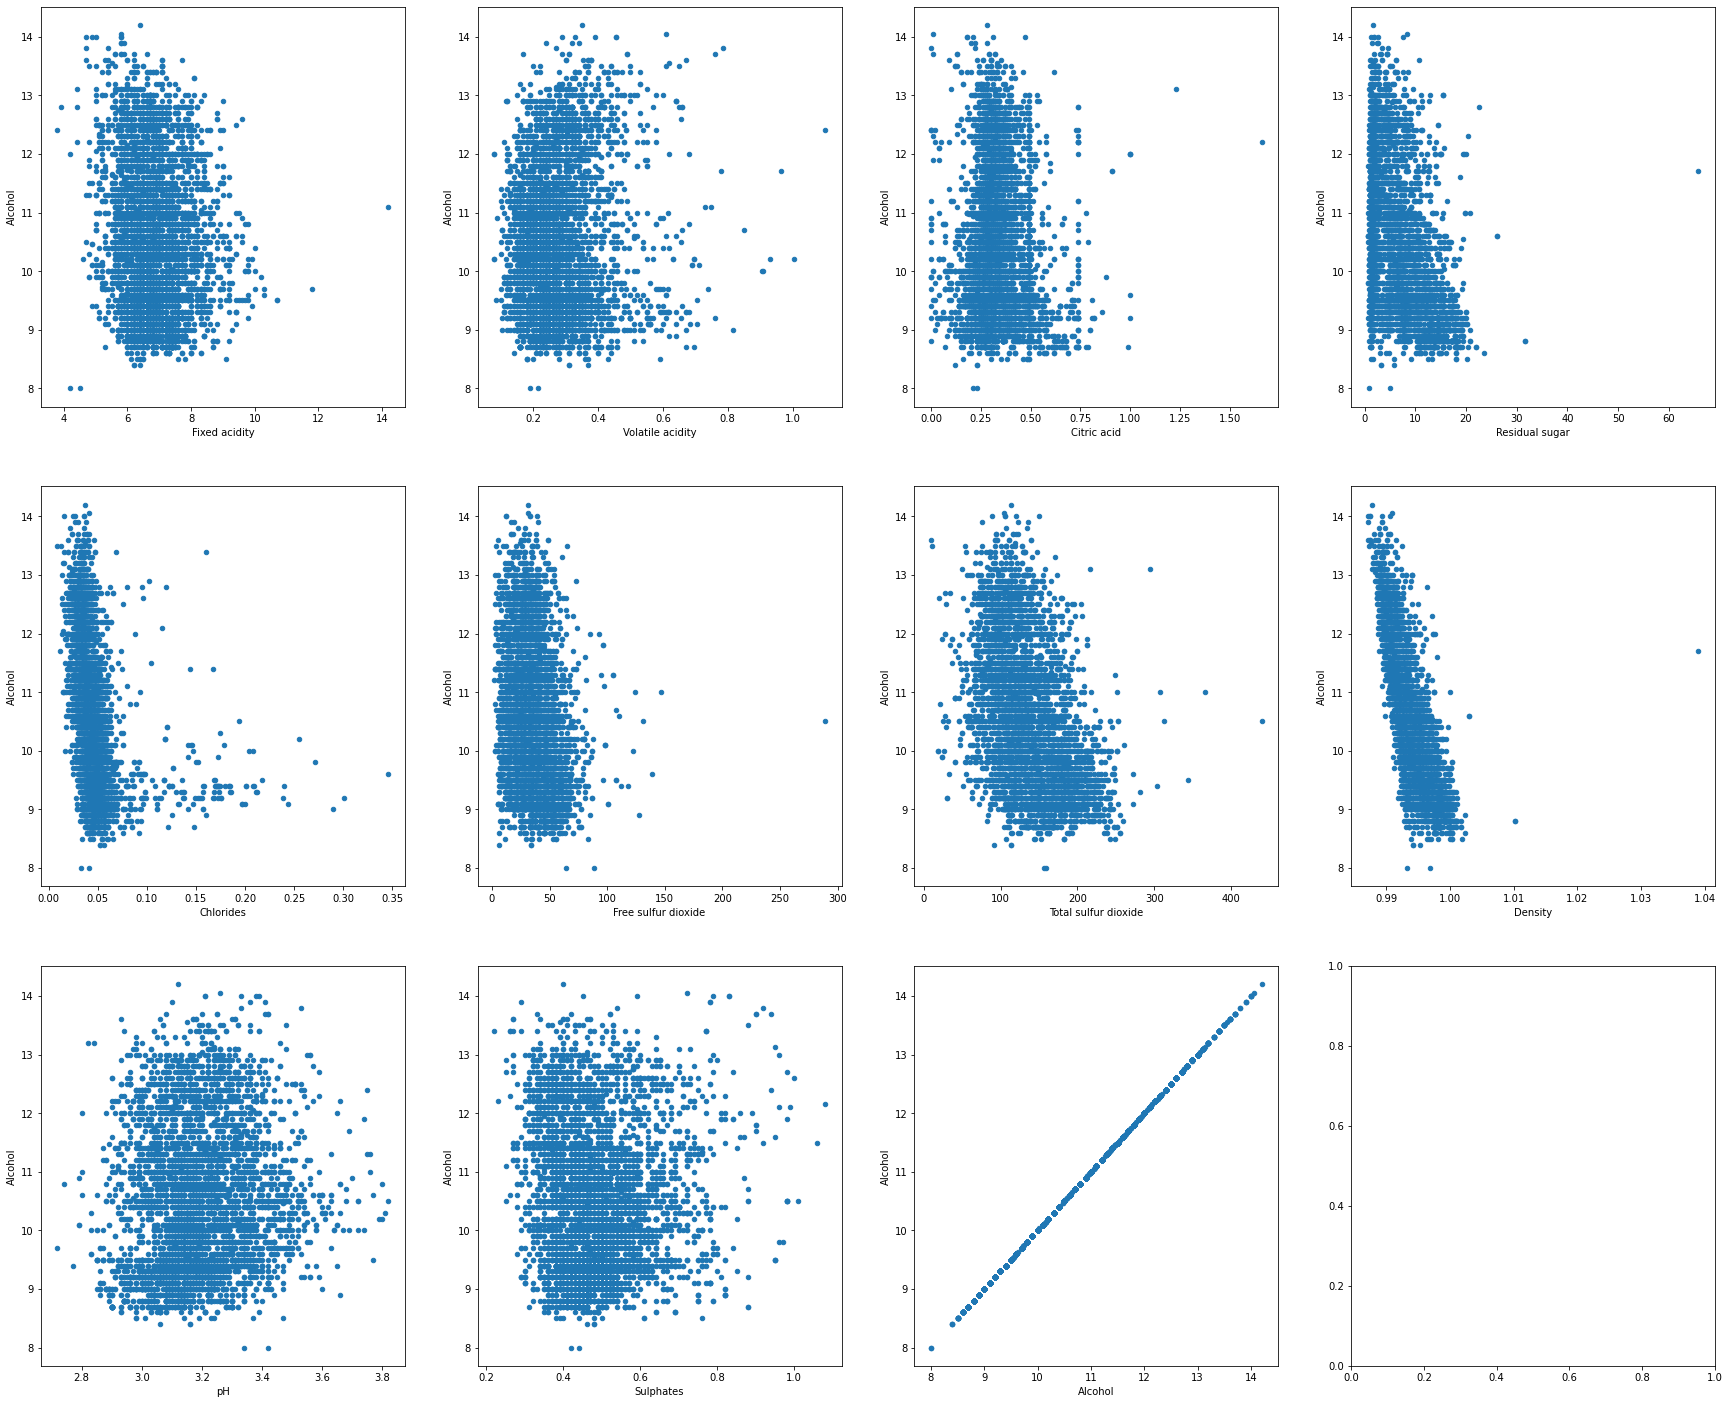

In [17]:
def plot_on_key(input, key):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 25))
    for idx, feature in enumerate(input.columns):
        input.plot(feature, "Alcohol", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])
    plt.show()
plot_on_key(input, 'Alcohol')

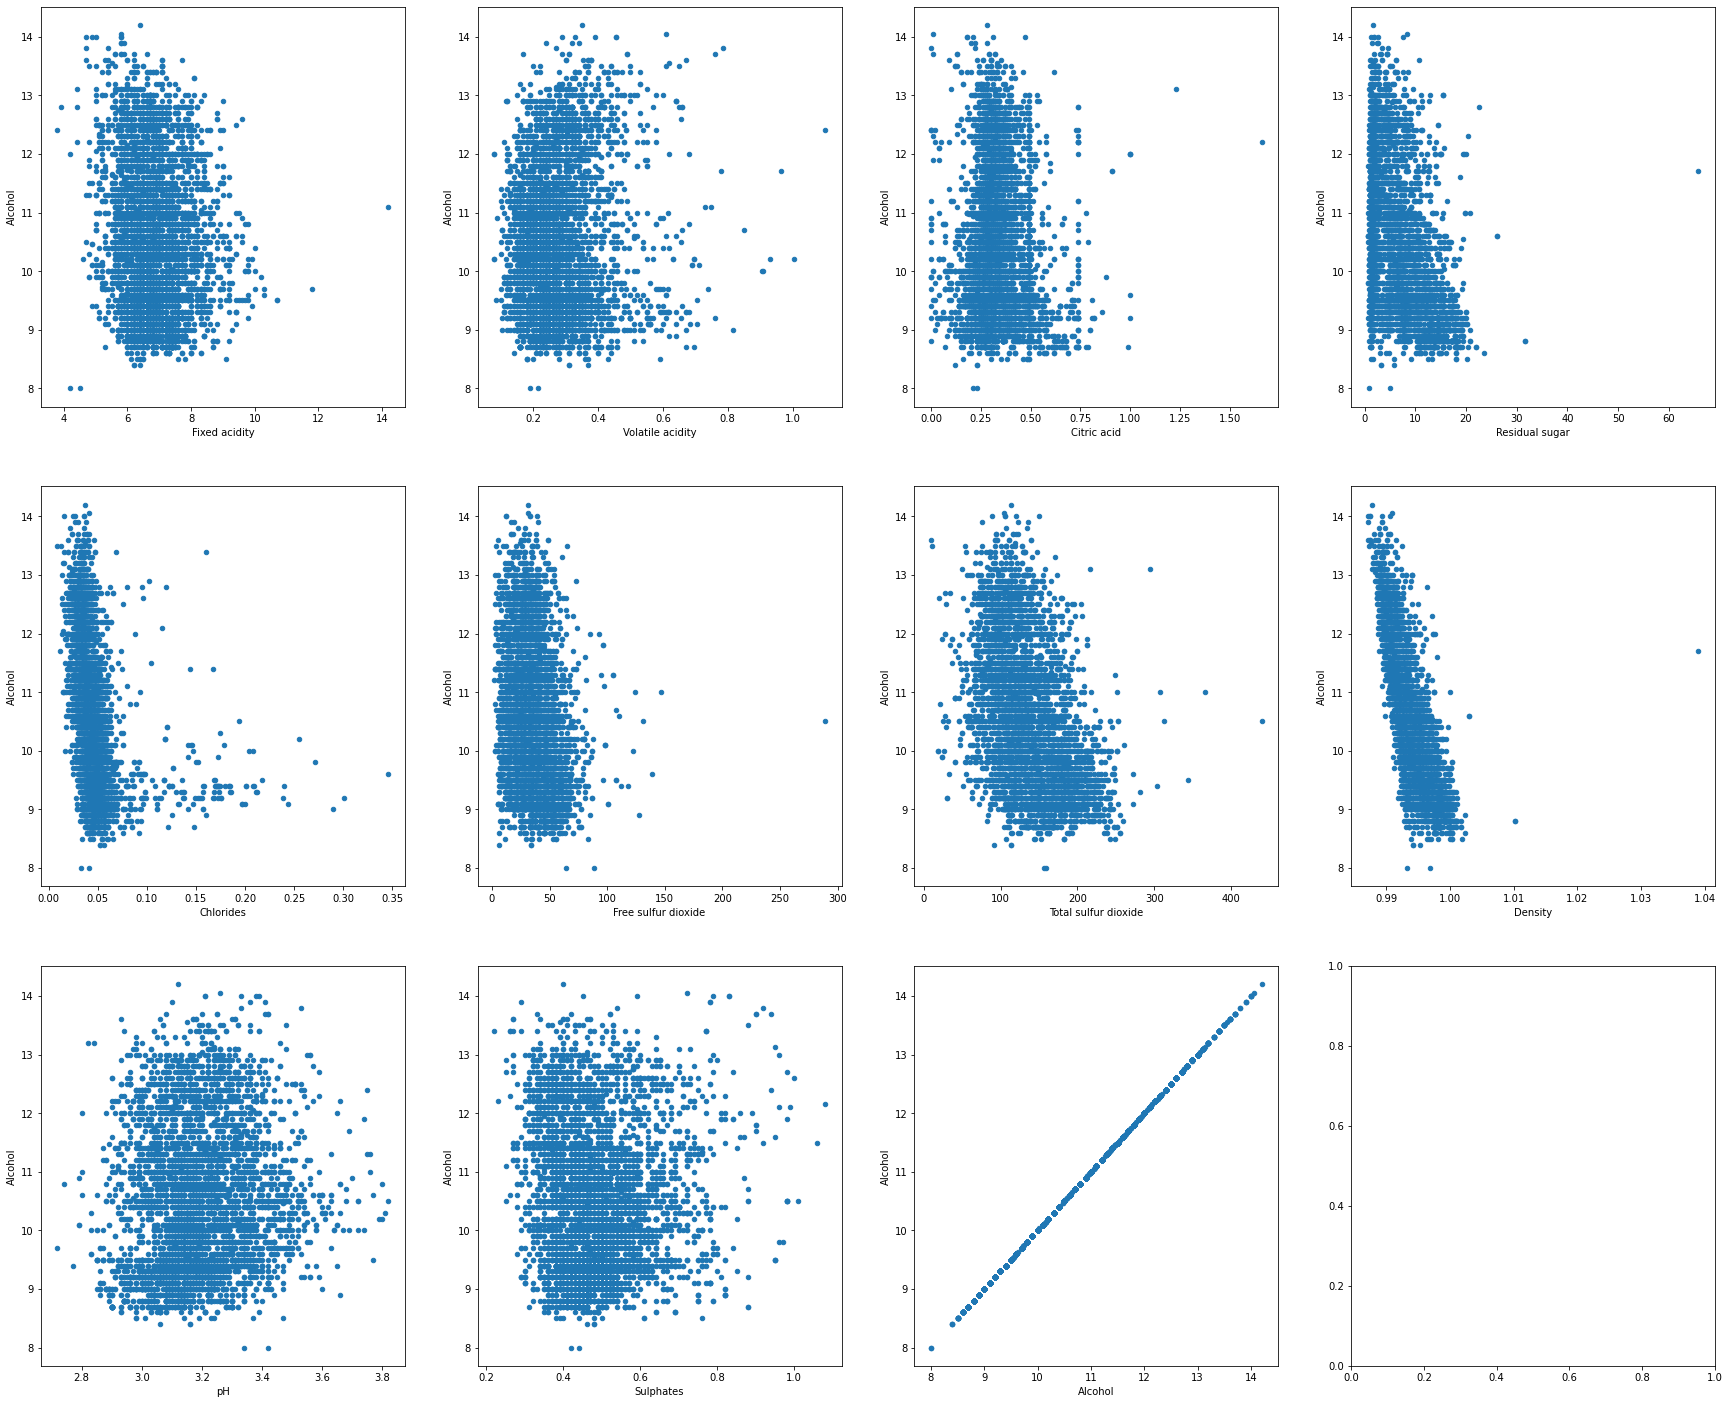

In [18]:
plot_on_key(input, 'Residual sugar')

<Axes: >

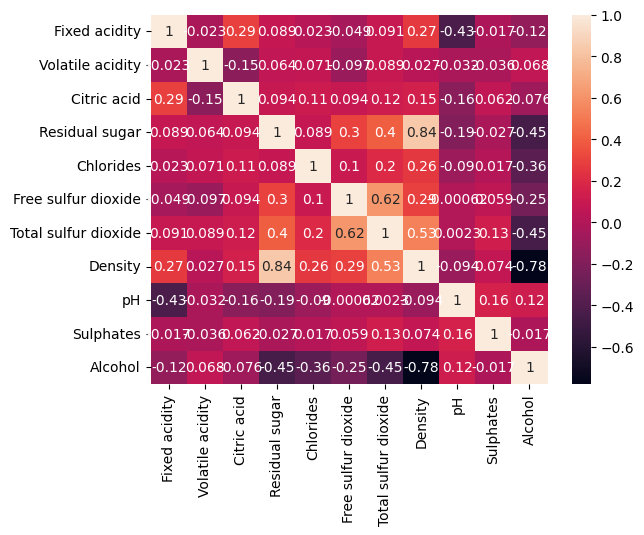

In [68]:
sns.heatmap(input.corr(), annot=True) # Тепловая карта

#### Проверка наличия зависимотей качества вина от параметров.

Наблюдаются выбросы.

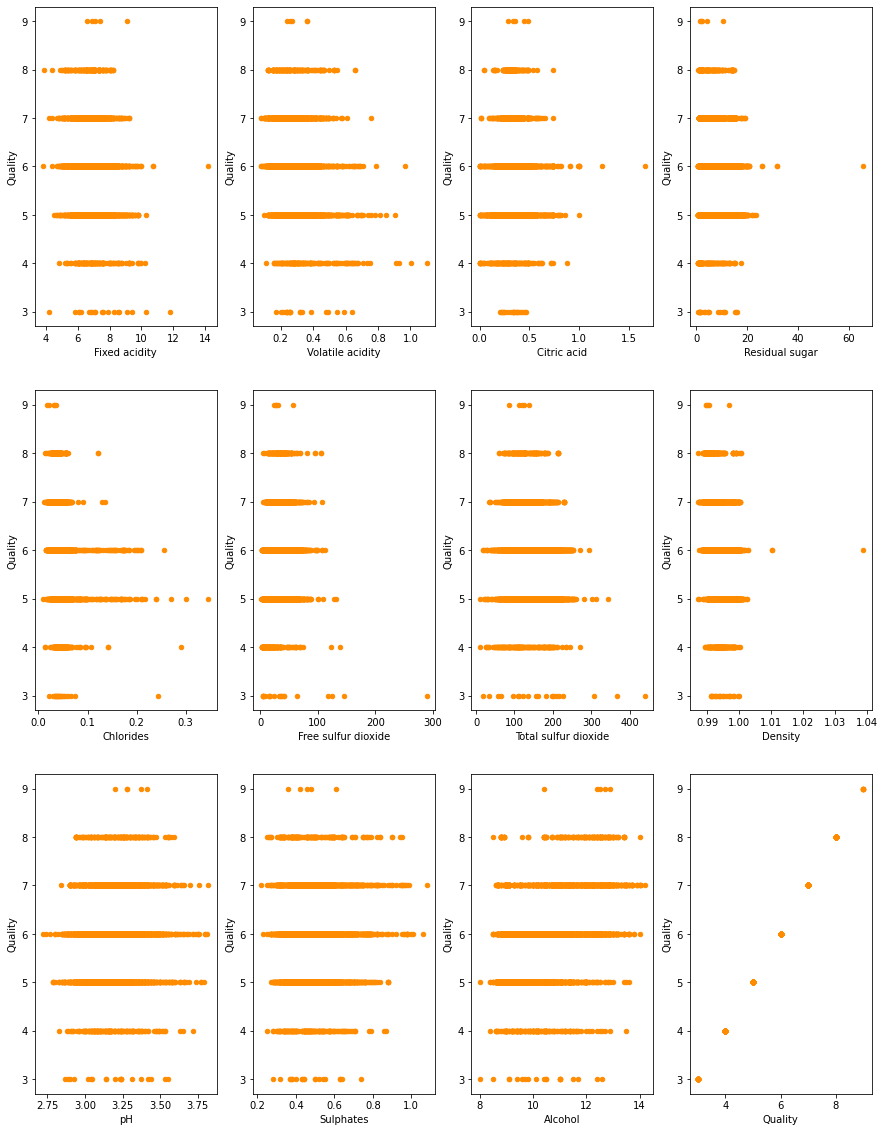

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "Quality", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4], color='darkorange')

#### Выбросы

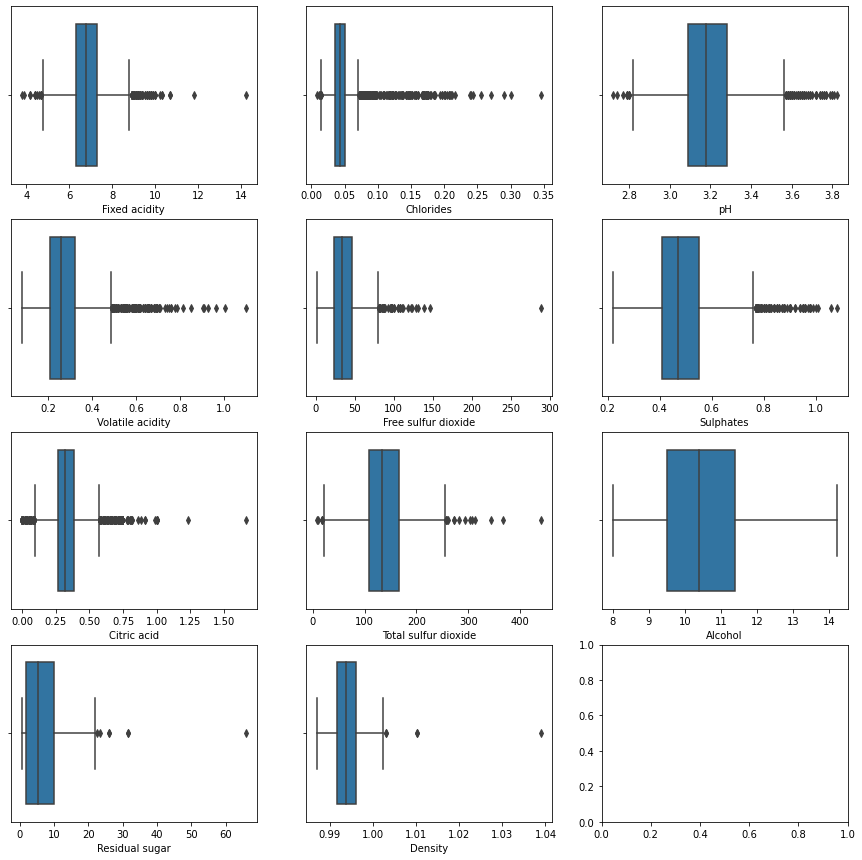

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
count = 0
for idx, feature in enumerate(input.columns):
    sns.boxplot(x=df[feature], ax=axes[count % 4, count // 4])
    count += 1

#### Распределение

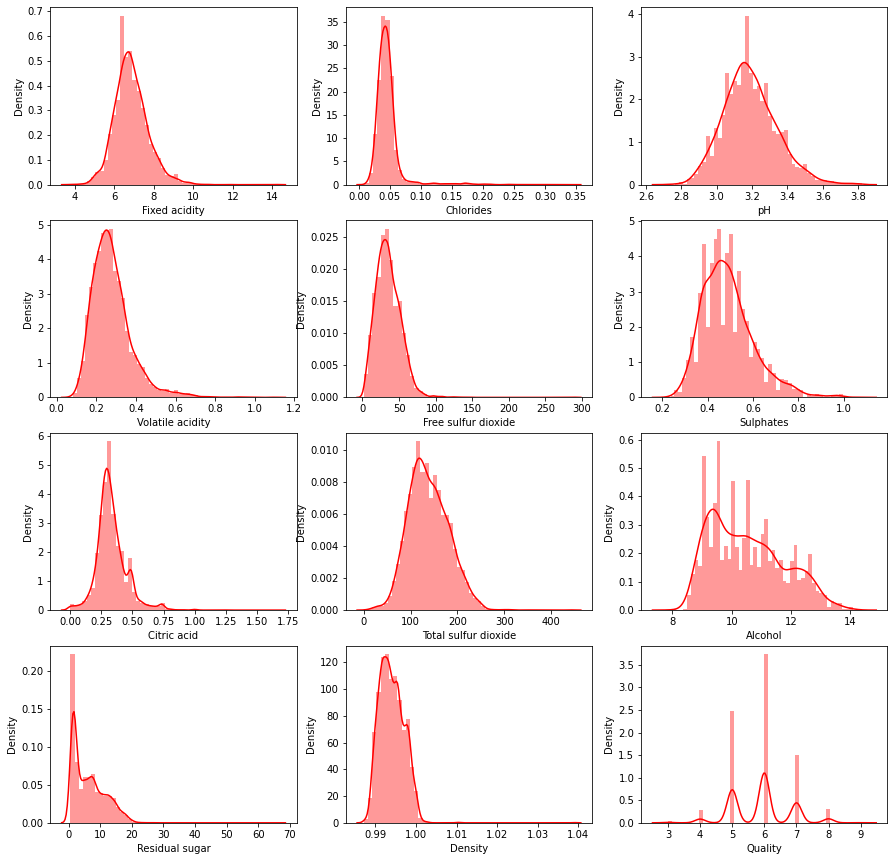

In [22]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
count = 0
for idx, feature in enumerate(df.columns):
    sns.distplot(df[feature], bins=50, color='r', ax=axes[count % 4, count // 4])
    count += 1

Pair plot

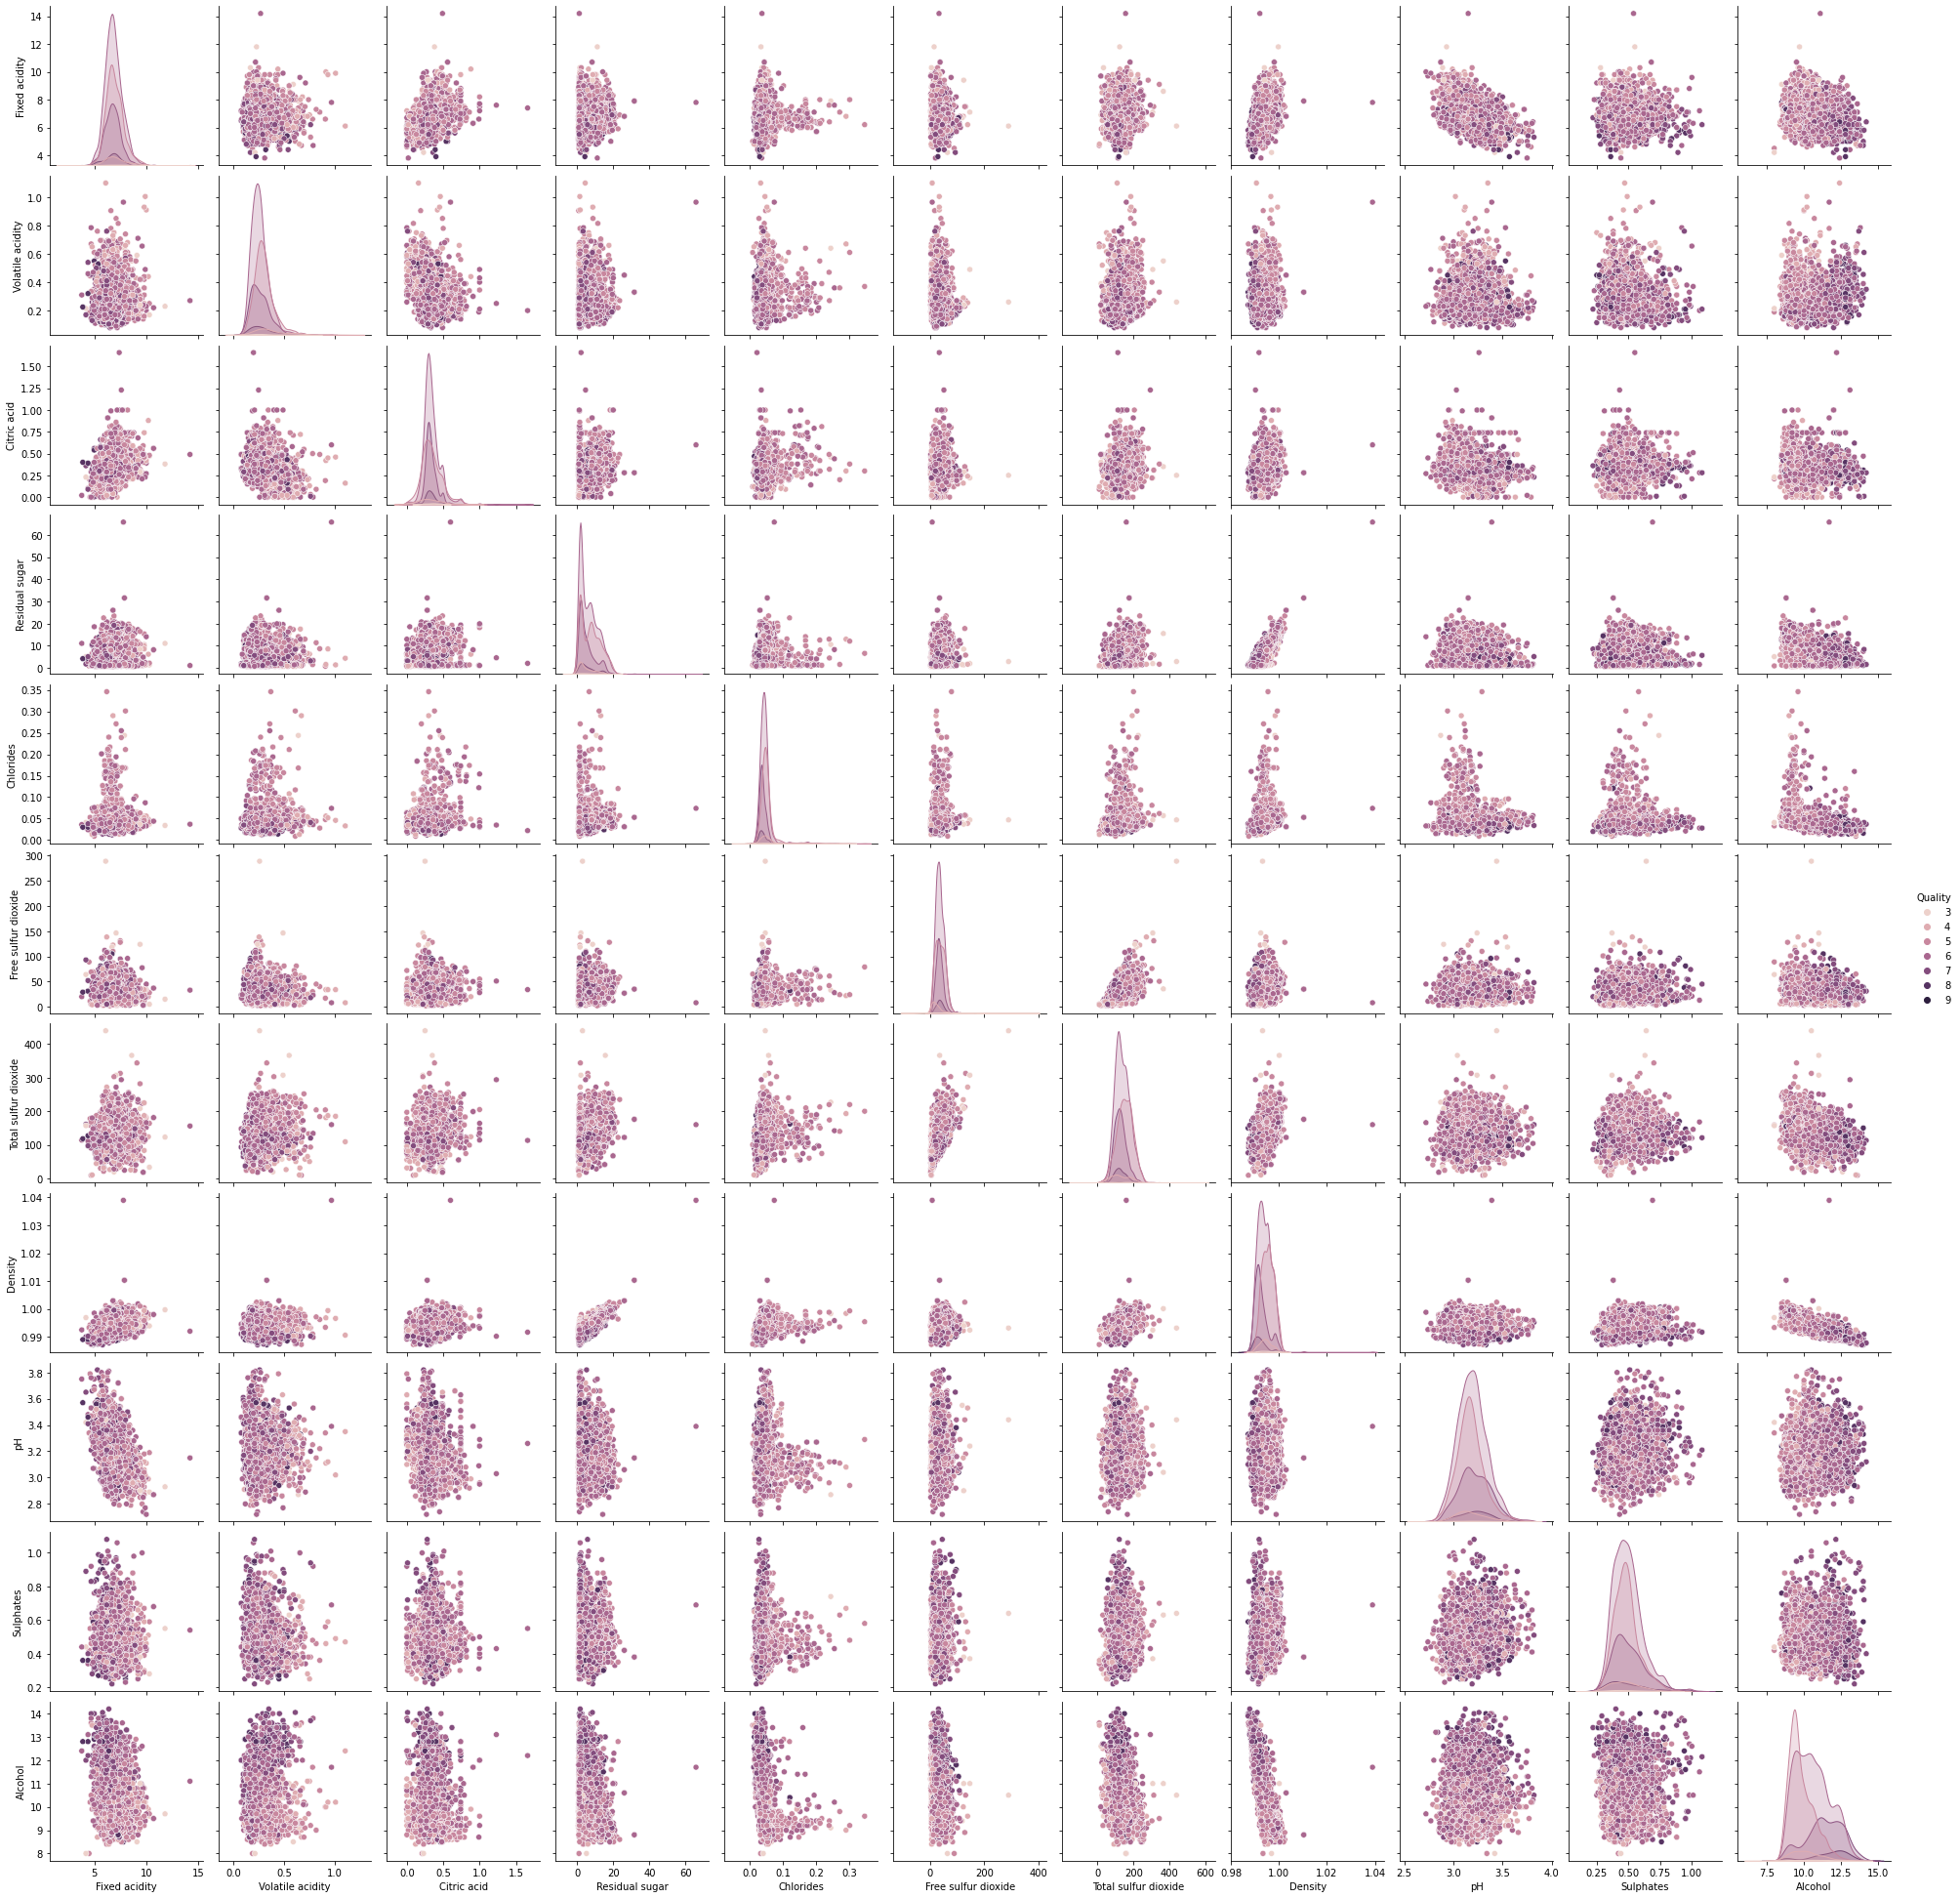

In [24]:
sns.pairplot(df, hue="Quality")

#### PCA

In [25]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[:5]

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01,
         2.82134917e+00, -3.53550004e-02,  5.69931577e-01,
         7.44565035e-01,  2.33151201e+00, -1.24692128e+00,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02,
        -9.44765273e-01,  1.47747079e-01, -1.25301866e+00,
        -1.49684624e-01, -9.15417164e-03,  7.40028640e-01,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01,
         1.00282190e-01,  1.93522599e-01, -3.12141119e-01,
        -9.73335626e-01,  3.58664800e-01,  4.75101984e-01,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.17277959e-01,
         4.15768217e-01,  5.59726758e-01,  6.87541270e-01,
         1.12109121e+00,  5.25855242e-01,  1.14803354e-02,
        -7.87341887e-01, -4.99203231e-01,  1.37870140e-01],
       [ 4.09124986e-01, -4.78657278e-01, -1.1727795

In [26]:
model = PCA(n_components=3)
model.fit(df_scaled)
df_pca_3 = model.transform(df_scaled)

In [27]:
def draw_3d(data):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    for f in data:
        ax.scatter(f[0], f[1], f[2], c='b')
    plt.show()

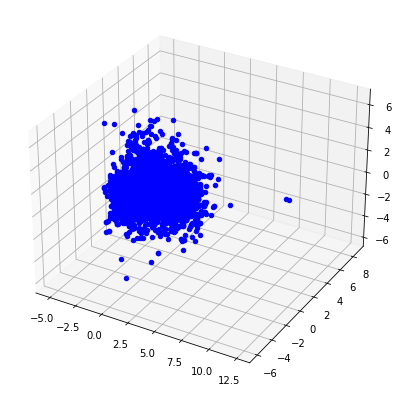

In [28]:
draw_3d(df_pca_3)

Присутствуют выбросы

2D, colored

In [29]:
model = PCA(n_components=2)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[ 3.54331807, -0.35508731],
       [-0.61279979,  0.28941107],
       [ 0.14239381, -1.16802119],
       [ 1.37952507,  0.19958733],
       [ 1.37952507,  0.19958733]])

In [30]:
df_to_draw = pd.DataFrame({
    'class': res_out,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

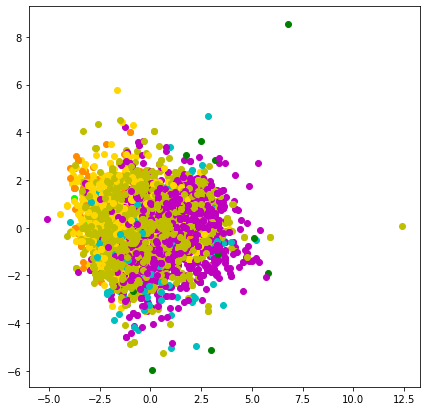

In [31]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], c=colors[int(f[1]['class'])])
    
plt.show()

3D, colored

In [32]:
model = PCA(n_components=3)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[ 3.54331807, -0.35508731, -0.3258329 ],
       [-0.61279979,  0.28941107,  0.81643443],
       [ 0.14239381, -1.16802119, -0.15306811],
       [ 1.37952507,  0.19958733, -0.32449651],
       [ 1.37952507,  0.19958733, -0.32449651]])

In [33]:
df_to_draw = pd.DataFrame({
    'class': res_out,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
    'pca3': pca_coords[:, 2],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

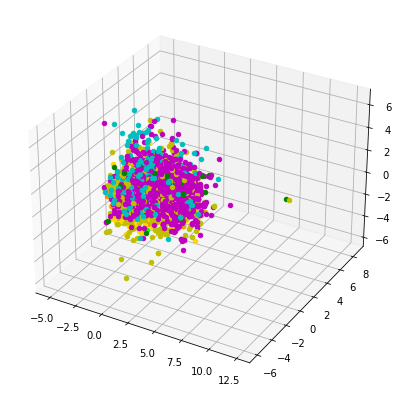

In [34]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], f[1]['pca3'], c=colors[int(f[1]['class'])])
plt.show()

## Бейзлайн-модель

In [82]:
target = df[['Quality']] # Целевой показатель
X_array = input
Y_array = target

In [83]:
X_array.shape, Y_array.shape

((4898, 11), (4898, 1))

Разделение на обучающую (75%) и тестовую (25%) выборки

In [145]:
X_array_train, X_array_test, Y_array_train, Y_array_test = train_test_split(X_array, Y_array, random_state=2, test_size=0.25) 
X_array_train.shape, X_array_test.shape, Y_array_train.shape, Y_array_test.shape

((3673, 11), (1225, 11), (3673, 1), (1225, 1))

Масштабирование обучающей и тестовой выборок

In [146]:
scaler = StandardScaler()
X_array_train = scaler.fit_transform(X_array_train)
X_array_test = scaler.transform(X_array_test)

### DummyCalssifier - Baseline

In [147]:
# Задача классификации
#dummy_clf = DummyClassifier(strategy="most_frequent")
#dummy_clf.fit(X_array_train, Y_array_train);
#y_dummy_predict = dummy_clf.predict(X_array_test)

In [148]:
#print("Accuracy score (dummy-test): {:.5f}".format(accuracy_score(Y_array_test, y_dummy_predict)))

In [155]:
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_array_train, Y_array_train)
y_dummy_predict = dummy_reg.predict(X_array_test)
#X_array_test.min(), X_array_test.max(), X_array_train.min(), X_array_train.max()

In [156]:
print("Mean absolute error (dummy-test): {:.5f}".format(mean_absolute_error(Y_array_test, y_dummy_predict)))

Mean absolute error (dummy-test): 0.65686


### Linear regression

#### MAE

Обучение модели. Вывод средней абсолютной ошибки.

In [157]:
linear_reg = LinearRegression()

linear_reg.fit(X_array_train, Y_array_train)

Y_train_prediction = linear_reg.predict(X_array_train)
print("Mean absolute error (LinearRegression-train): {:.5f}".format(mean_absolute_error(Y_array_train, Y_train_prediction)))

Y_test_prediction = linear_reg.predict(X_array_test)
print("Mean absolute error (LinearRegression-test): {:.5f}".format(mean_absolute_error(Y_array_test, Y_test_prediction)))

Mean absolute error (LinearRegression-train): 0.58312
Mean absolute error (LinearRegression-test): 0.58584


#### MSE, RMSE

Обучение модели. Вывод средней квадратичной ошибки.

In [158]:
print(f'MSE for Dummy Regressor: {mean_squared_error(Y_array_test, y_dummy_predict)}')
print(f'MSE for Linear regression: {mean_squared_error(Y_array_test, Y_test_prediction)}')

MSE for Dummy Regressor: 0.7498618020618573
MSE for Linear regression: 0.5765523771614226


In [159]:
print(f'RMSE for Dummy Regressor: {mean_squared_error(Y_array_test, y_dummy_predict, squared=False)}')
print(f'RMSE for Linear regression: {mean_squared_error(Y_array_test, Y_test_prediction, squared=False)}')

RMSE for Dummy Regressor: 0.8659456114917711
RMSE for Linear regression: 0.7593104616436037


In [160]:
def plot_model_results(actual, predicted, title):
  results = pd.DataFrame({'True': actual, 'Prediction': predicted})
  sns.lmplot(x='True', y='Prediction', data=results, fit_reg=False)
  d_line= np.arange(results.min().min(), results.max().max())
  plt.plot(d_line, d_line, color='red', linestyle='--')
  plt.title = title
  plt.grid()
  plt.show()

In [161]:
Y_array_test.shape, y_dummy_predict.shape, Y_test_prediction.shape

((1225, 1), (1225,), (1225, 1))

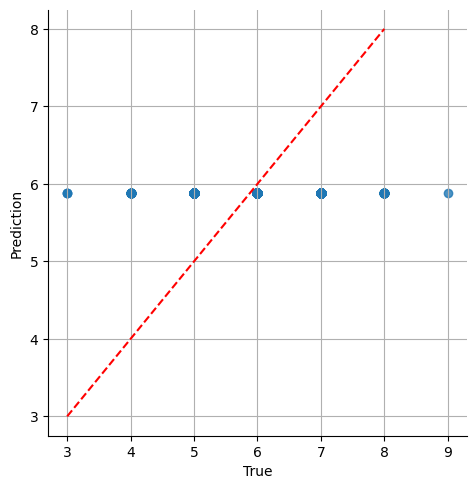

In [162]:
plot_model_results(Y_array_test['Quality'], y_dummy_predict.flatten(), title='Dummy')

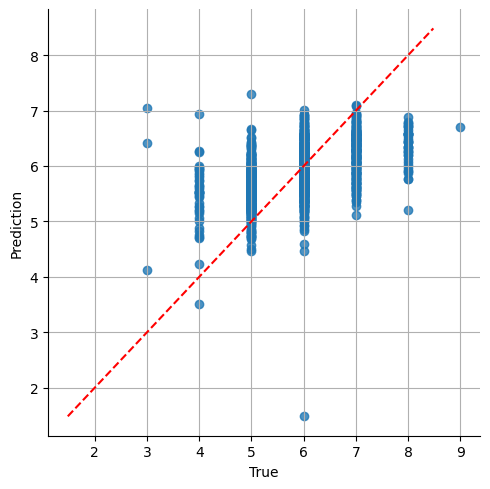

In [163]:
plot_model_results(Y_array_test['Quality'], Y_test_prediction.flatten(), title='Linear Regression')

Поскольку оценка проводится по шкале от 0 до 10, в качестве метрики выберем MSE (при ошибке более, чем  на бал, ошибка в квадрате будет квадратично расти).